In [1]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os

# [IAPR][iapr]: Project


**Group ID:** 32

**Author 1 (sciper):** Alexia Dormann (301997)
**Author 2 (sciper):** Valgerdur Jónsdóttir (351819)
**Author 3 (sciper):** Mariia Eremina (342236)

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](../data_project/project_description/train_00.png)

### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="../data_project/project_description/solution_example.png" width="512"/>
Solution 2
<img src="../data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle, you are always expected to find exactly 9, 12, 16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 2.1. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 2.2 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [1]:
## load images
import os 
from PIL import Image


import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_input_image(image_index ,  folder ="train" , path = "../data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path, folder ,filename )
    
    im= Image.open(os.path.join(path, folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "../data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)


In [3]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "../data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

../data_project/train_solution_06


In [4]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)
  


solving  6
../data_project/train_solution_00
solving  10
../data_project/train_solution_00


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$


In [5]:
import skimage.filters
import skimage.io
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

## 4.1. Segmenting the puzzle pieces

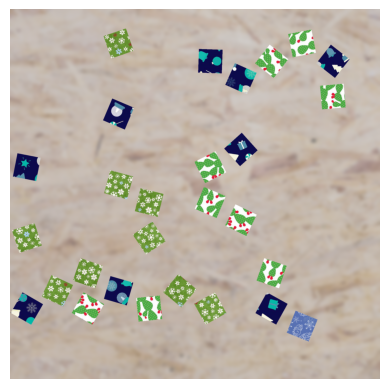

In [6]:
#Load image to explore 
img = skimage.io.imread('../data_project2/train2/train_02.png')

plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
def segment_pieces(img):
    '''
    Segment the puzzle pieces.
    :param img: img to be segmented
    :return seg: img with drawn segmentation lines
    :return contours: contours of the puzzle pieces
    '''
    
    img_copy = img.copy()
    
    # Preprocessing: blur image
    blur = cv2.medianBlur(img,ksize= 21)
    
    # Find edges
    canny = cv2.Canny(blur, 20, 100, 1)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    dilate = cv2.dilate(canny, kernel, iterations=3)
    
    # Fill in big contours to remove edges inside pieces
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    fill_in = np.zeros_like(img)
    for c in contours:
        fill_in = cv2.drawContours(fill_in, [c], 0, (255,0,0), thickness=cv2.FILLED)
        
    # Find minrect fitting in fill_in contours
    canny = cv2.Canny(fill_in, 10, 100, 1)
    contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
    
        seg = cv2.drawContours(img_copy,[box],0,(0,255,0), 3)
        
    return seg, contours[::2]
    

In [8]:
def extract_pieces(img, contours):
    '''
    Extract the puzzle pieces using the segmentation.
    :param img: image from which the pieces are extracted
    :param contours: contours of puzzle pieces on the image
    :return pieces: list of the extracted puzzle pieces
    '''
    
    pieces = []
    for c in contours:
        # Find angle and center of min rectangle fitting in each contours
        rect = cv2.minAreaRect(c)
        angle, center = rect[2], rect[0]
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # Extract only current puzzle piece on image
        temp = cv2.drawContours(np.zeros_like(img),[box],0 , (255,255,255) , thickness=cv2.FILLED)
        idx_puzzle = np.where(temp == 255)
        piece = np.zeros_like(img); piece[idx_puzzle] = img[idx_puzzle]
    
        # Rotate image so that piece is centered
        rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_piece = cv2.warpAffine(piece, rot_mat, piece.shape[1::-1], flags=cv2.INTER_LINEAR)
        
        # Extract piece by cropping image
        idx_piece = np.where(rotated_piece!=0)
        x, y = np.min(idx_piece[1])+10, np.min(idx_piece[0])+10
        crop = rotated_piece[y:y+128, x:x+128,:]
        pieces.append(crop)
    
    return pieces


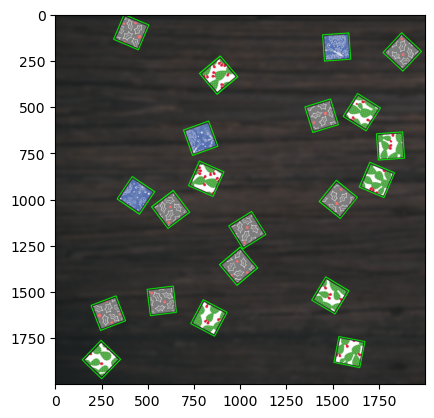

In [73]:
img = skimage.io.imread('../data_project2/train2/train_03.png')
seg, contours = segment_pieces(img)
plt.imshow(seg); plt.show()

In [74]:
def display_images_in_grid(puzzle_pieces, cmap = None):
    '''
    Display the puzzle pieces in a grid.
    :param puzzle_pieces: list of puzzle pieces
    :param cmap: color map
    '''

    # Determine grid size based on the number of images
    grid_size = math.ceil(math.sqrt(len(puzzle_pieces)))

    fig, axs = plt.subplots(grid_size, grid_size)

    for i, ax in enumerate(axs.flatten()):
        if i < len(puzzle_pieces):
            if cmap is None:
                ax.imshow(puzzle_pieces[i])
            else:
                ax.imshow(puzzle_pieces[i], cmap=cmap)
            ax.axis('off')  # Hide axes
        else:
            fig.delaxes(ax)  # Remove empty subplots

    fig.suptitle('Number of puzzle pieces: ' + str(len(puzzle_pieces)), fontsize=12)
    plt.show()

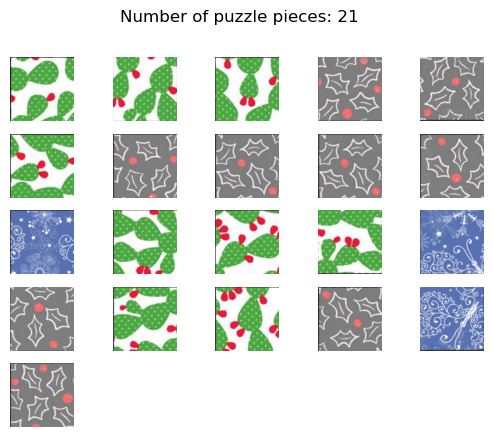

In [75]:
puzzles = extract_pieces(img, contours)
display_images_in_grid(puzzles)

## 4.2. Extracting features of interest

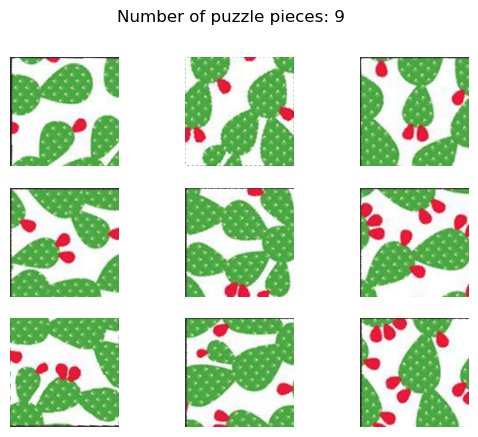

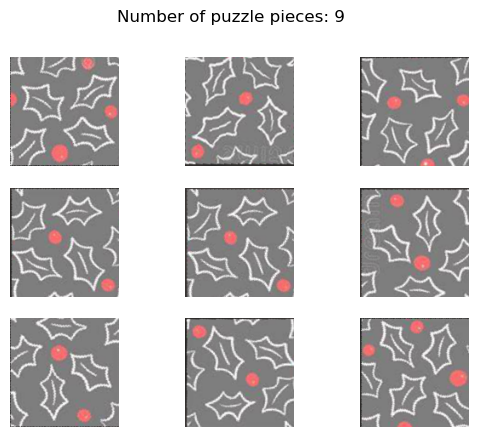

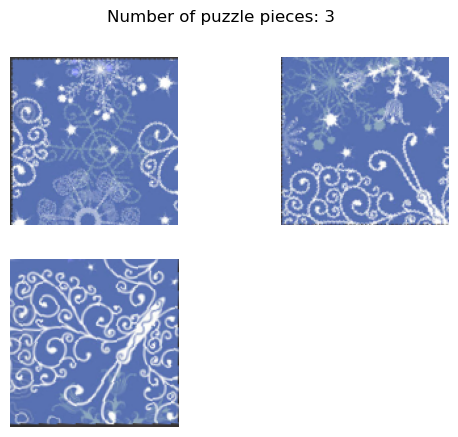

In [76]:
#### manually labeled pieces - can be used for validation
puzzle1 = [puzzles[0], puzzles[1], puzzles[2], puzzles[5], puzzles[11], puzzles[12], puzzles[13], puzzles[16], puzzles[17]]
display_images_in_grid(puzzle1)

puzzle2 = [puzzles[3], puzzles[4], puzzles[6], puzzles[7], puzzles[8], puzzles[9], puzzles[15], puzzles[18], puzzles[20]]
display_images_in_grid(puzzle2)

puzzle3 = [puzzles[10], puzzles[14], puzzles[19]]
display_images_in_grid(puzzle3)

### Color features
Color histograms represent color distribution in an image. Thus, we can use them to describe the color of the puzzle pieces. We will use the color histogram as a feature vector. The color histogram is a 3D histogram, where each dimension represents the color channel (red, green, blue). The histogram is computed for each channel and then concatenated into a single feature vector. However, color histograms do not capture spatial information, so we need to keep in mind that two completely different images can have the same color histogram.

Three different color features are computed from the color histogram of each puzzle piece:
1. Mean and standard deviation of each color channel.
2. Average red and green color values of the image.

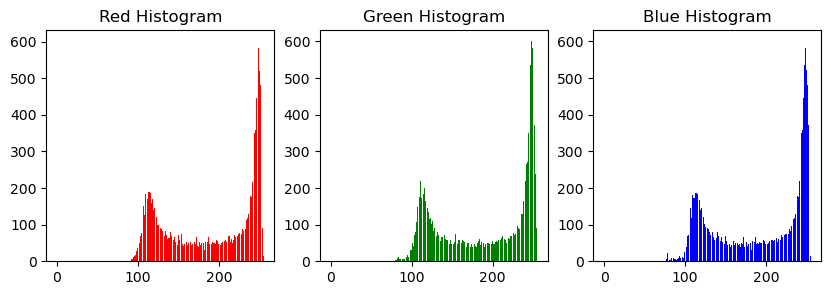

In [59]:
def plot_color_histogram(img):
    '''
    Plot the color histogram of an image.
    param img: image of which the color histogram is plotted
    '''
    # Compute color histograms
    red_hist = np.histogram(img[:,:,0], bins=256, range=[0,256])
    green_hist = np.histogram(img[:,:,1], bins=256, range=[0,256])
    blue_hist = np.histogram(img[:,:,2], bins=256, range=[0,256])

    # Plot histograms
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.bar(red_hist[1][:-1], red_hist[0], color='red')
    plt.title('Red Histogram')
    plt.subplot(1, 3, 2)
    plt.bar(green_hist[1][:-1], green_hist[0], color='green')
    plt.title('Green Histogram')
    plt.subplot(1, 3, 3)
    plt.bar(blue_hist[1][:-1], blue_hist[0], color='blue')
    plt.title('Blue Histogram')
    plt.show()

# test the function
plot_color_histogram(puzzles[10])

In [60]:
def color_histogram(img, bins=(8,8,8)):
    '''
    Extract color histogram features from the image.
    :param img: image in RGB color space from which the features are extracted
    :param bins: number of bins for each channel
    :return hist: color histogram
    '''

    # Compute the color histogram
    hist = cv2.calcHist([img], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])

    # Normalize histogram so the sum of all bin heights is 1 and flatten
    hist = cv2.normalize(hist, hist).flatten()

    return hist

In [77]:
def mean_std_hist(rgb_histogram):
    '''
    Compute the mean and standard deviation of the color histogram, to use as features.
    :param rgb_histogram: color histogram
    :return mean: mean of the color histogram
    :return std: standard deviation of the color histogram
    '''
    mean = np.mean(rgb_histogram)
    std = np.std(rgb_histogram)
    return mean, std

def average_color(img):
    '''
    Compute the average red and green value of the image.
    :param img: image in RGB color space
    :return avg_red: average red value
    '''
    avg_red = np.mean(img[:,:,0])
    avg_green = np.mean(img[:,:,1])
    return avg_red, avg_green

### Texture features
We can use Gabor filters to classify textures. Gabor filters are linear filters used for texture analysis, so they are able to analyze and understand the structural content or patterns in an image.

2D Gabor filters have rich applications in image processing, especially in feature extraction for texture analysis and segmentation. $f$ defines the frequency being looked for in the texture. By varying $\theta$, we can look for texture oriented in a particular direction. By varying $\sigma$, we change the size of the image region being analyzed.

The scale of a Gabor filter is determined primarily by the wavelength (λ) of the sinusoidal wave in the Gabor function and also by the standard deviation (σ) of the Gaussian function.

1. **Wavelength (λ):** This parameter determines the frequency of the sinusoidal part of the Gabor filter and thus defines the size of the structures (e.g., edges, lines) that the filter will respond to. For example, a Gabor filter with a small λ value will respond to high-frequency changes (small, finely detailed structures), while a filter with a large λ value will respond to low-frequency changes (large, coarse structures).

2. **Standard deviation (σ) of the Gaussian function:** This parameter controls the spatial extent of the Gabor filter (i.e., the size of the Gaussian window). A larger σ results in a larger filter size, which means the filter captures a larger area or scale in the image. Conversely, a smaller σ results in a smaller filter size, which captures a smaller area or scale in the image.

Gabor features:
1. Mean
2. Standard deviation
3. Kurtosis: measures the "tailedness" of the distribution. High kurtosis might suggest the presence of strong edge-like or line-like features (which would generate high-magnitude responses from the Gabor filter), whereas a low kurtosis could indicate a more homogeneous or smooth texture.
4. Power spectrum: compute power spectrum of the filter responses and use features such as the peak frequency, bandwidth, or total power, or mean, median, variance.


In [78]:
import cv2
from scipy import stats

def gabor_filter(ksize, sigma, theta, lambd, gamma = 1, psi = 0):
    '''
    Define a gabor filter that can be used to extract texture features.
    :param ksize: size of gabor filter, must be an odd number
    :param sigma: standard deviation of the gaussian envelope, size of image region being analyzed
    :param theta: orientation of the function, 0 is horizontal, 90 is vertical
    :param lambd: wavelength of the sinusoidal factor, frequency being looked for in the texture (high frequency = fine details/slim borders, low frequency = coarse details/thick borders)
    :param gamma: spatial aspect ratio
    :param psi: phase offset
    :return: a gabor filter
    '''
    gabor_filter = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    return gabor_filter

In [79]:
def gabor_filter_bank(ksize, sigmas, lambdas, thetas):
    '''
    Create a gabor filter bank.
    :param ksize: size of gabor filter, must be an odd number
    :param sigmas: standard deviation of the gaussian envelope, size of image region being analyzed
    :param lambdas: wavelength of the sinusoidal factor, frequency being looked for in the texture (high frequency = fine details/slim borders, low frequency = coarse details/thick borders)
    :param thetas: orientation of the function, 0 is horizontal, 90 is vertical
    :return: a gabor filter bank
    '''
    gabor_filter_bank = []
    for sigma in sigmas:
        for lambd in lambdas:
            for theta in thetas:
                gabor_filter_bank.append(gabor_filter(ksize, sigma, theta, lambd))
    return gabor_filter_bank

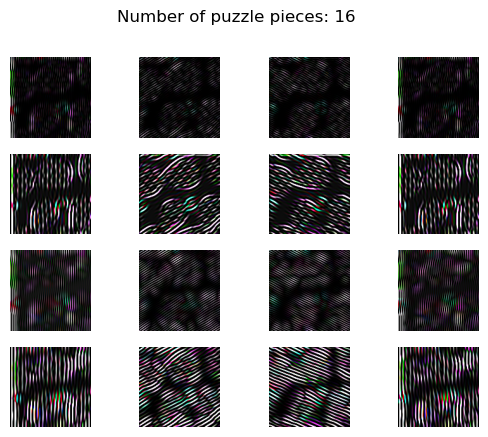

In [80]:
# call the function to create a gabor filter bank
ksize = 31
sigmas = [3, 5]
lambdas = [3, 5]
thetas = [0, 45, 90, 135]
gabor_filter_bank = gabor_filter_bank(ksize, sigmas, lambdas, thetas)

# apply the gabor filter bank to the image
def apply_gabor_filter_bank(img, gabor_filter_bank):
    '''
    Apply a gabor filter bank to the image.
    :param img: image in RGB color space
    :param gabor_filter_bank: gabor filter bank
    :return: list of filtered images
    '''
    filtered_images = []
    for gabor_filter in gabor_filter_bank:
        filtered_image = cv2.filter2D(img, cv2.CV_8UC3, gabor_filter)
        filtered_images.append(filtered_image)
    return filtered_images

# plot filtered images
filtered_images = apply_gabor_filter_bank(puzzles[0], gabor_filter_bank)
display_images_in_grid(filtered_images)

In [81]:
def gabor_features(gabor_images):
    '''
    Extract features from gabor convoluted images, such as mean, standard deviation, kurtosis, power spectrum
    :param gabor_images: list of filtered images
    :return features_mean: list of mean values
    :return features_std: list of standard deviation values
    :return features_kurtosis: list of kurtosis values
    '''
    features_mean = []
    features_std = []
    features_kurtosis = []
    for image in gabor_images:
        # Extract mean of image as a feature
        features_mean.append(np.mean(image))
        # Extract standard deviation of image as a feature
        features_std.append(np.std(image))
        # Extract kurtosis of image as a feature
        kurtosis_value = stats.kurtosis(image.flatten(), fisher=True)
        features_kurtosis.append(kurtosis_value)

    return features_mean, features_std, features_kurtosis

In [82]:
# compute power spectrum of the filter responses
def power_spectrum(gabor_images):
    '''
    Compute power spectrum of the filter responses
    :param gabor_images: list of filtered images
    :return features: list of power spectrum values
    '''
    power_spectrum = []
    for image in gabor_images:
        # Apply Fourier transform
        f = np.fft.fft2(image)
        # shift the zero-frequency component to the center of the spectrum
        fshift = np.fft.fftshift(f)
        # compute the magnitude spectrum
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        pwr_spectrum = np.abs(magnitude_spectrum)**2
        power_spectrum.append(pwr_spectrum)

    return power_spectrum

def compute_power_spectrum_features(power_spectrum):
    # Flatten every power spectrum
    power_spectrum_flat = power_spectrum

    # Compute features
    mean_power = np.mean(power_spectrum_flat)
    max_power = np.max(power_spectrum_flat)
    std_power = np.std(power_spectrum_flat)
    skewness_power = stats.skew(power_spectrum_flat)
    kurtosis_power = stats.kurtosis(power_spectrum_flat, fisher=True)

    return mean_power, max_power, std_power, skewness_power, kurtosis_power

In [83]:
def extract_features(img):
    '''
    Extract features from the image.
    :param img: image in RGB color space
    :return features: dictionary of features
    '''
    # Compute color histogram
    hist = color_histogram(img)

    # Compute mean and standard deviation of color histogram
    mean_color, std_color = mean_std_hist(hist)

    # Compute average red and green value
    avg_red, avg_green = average_color(img)

    # apply gabor filter bank
    # convert img to greyscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gabor_images = apply_gabor_filter_bank(img, gabor_filter_bank)

    # compute gabor features
    mean_gabor, std_gabor, kurtosis_gabor = gabor_features(gabor_images)

    # compute power spectrum of the filter responses
    power_spectrum(gabor_images)

    # extract features from the power spectrum
    mean_power, max_power, std_power, skewness_power, kurtosis_power = compute_power_spectrum_features(power_spectrum)

    # find features from the power spectrum
    #mean_pwr_spectrum, std_pwr_spectrum, peak_frequency, bandwidth = power_spectrum_features(power_spectrum)
    # define a dict of features
    features = {'mean_color': mean_color, 'std_color': std_color, 'avg_red': avg_red, 'avg_green': avg_green,
                'mean_gabor': mean_gabor, 'std_gabor': std_gabor, 'kurtosis_gabor': kurtosis_gabor,
                'mean_power': mean_power, 'max_power': max_power, 'std_power': std_power,
                'skewness_power': skewness_power, 'kurtosis_power': kurtosis_power}

    # Fix the format of features dict
    features_new = {}

    # Iterate over keys and values in the old dictionary
    for key, values in features.items():
            # Check if value is a list
        if isinstance(values, list):
            # Iterate over the list of values
            for i, value in enumerate(values):
                # Create a new key for each value in the list
                new_key = f"{key}_{i+1}"
                # Add the new key-value pair to the new dictionary
                features_new[new_key] = value
        else:
            # If value is not a list, copy the key-value pair to the new dictionary
            features_new[key] = values

    return features_new

In [84]:
# extract features from the manually labeled pieces
feature1 = []
for puzzle in puzzle1:
    feature = extract_features(puzzle)
    feature1.append(feature)

feature2 = []
for puzzle in puzzle2:
    feature = extract_features(puzzle)
    feature2.append(feature)

feature3 = []
for puzzle in puzzle3:
    feature = extract_features(puzzle)
    feature3.append(feature)

In [85]:
import pandas as pd
feature1_df = pd.DataFrame(feature1)
feature1_df.head()

,mean_color,std_color,avg_red,avg_green,avg_blue,mean_gabor_1,mean_gabor_2,mean_gabor_3,mean_gabor_4,mean_gabor_5,...,kurtosis_power_7,kurtosis_power_8,kurtosis_power_9,kurtosis_power_10,kurtosis_power_11,kurtosis_power_12,kurtosis_power_13,kurtosis_power_14,kurtosis_power_15,kurtosis_power_16
0,0.004010,0.044012,161.476624,201.185547,152.950195,14.412048,14.240051,14.702209,13.930420,40.563599,...,1.448769,0.966862,2.429515,2.892763,2.956812,1.907623,1.791348,2.704071,2.283191,1.445609
1,0.004349,0.043980,153.516418,194.719482,140.038269,14.710449,16.256470,14.720276,14.247925,48.813049,...,1.626747,0.737047,2.320758,2.290595,2.481749,2.188546,1.321701,2.472150,2.368995,1.165282
2,0.004192,0.043995,156.800171,193.615967,143.501892,16.260986,12.384338,13.384705,15.708435,46.866272,...,1.568220,0.778341,2.871106,2.752580,2.616099,2.110025,1.482149,2.589934,2.546753,1.168511
3,0.004386,0.043976,151.831482,191.481812,138.696411,12.904541,14.800110,15.295410,12.453430,37.146301,...,1.506265,0.794978,1.620605,3.302552,3.117775,1.253046,1.909349,2.831569,2.213692,1.459209
4,0.004498,0.043965,138.619751,187.686157,125.922058,15.260864,14.841431,19.385010,14.610474,44.592468,...,1.245808,0.852850,2.173867,2.493978,3.219070,1.665213,1.935567,2.364663,2.209241,1.386808


In [86]:
feature2_df = pd.DataFrame(feature2)
feature2_df.head()

,mean_color,std_color,avg_red,avg_green,avg_blue,mean_gabor_1,mean_gabor_2,mean_gabor_3,mean_gabor_4,mean_gabor_5,...,kurtosis_power_7,kurtosis_power_8,kurtosis_power_9,kurtosis_power_10,kurtosis_power_11,kurtosis_power_12,kurtosis_power_13,kurtosis_power_14,kurtosis_power_15,kurtosis_power_16
0,0.003721,0.044037,145.372559,139.010193,139.338684,16.032532,15.222107,13.779480,16.018982,37.495239,...,1.756675,0.592504,2.396829,2.928260,2.420652,2.124579,1.238312,2.813580,2.352314,1.248582
1,0.003620,0.044046,142.210693,138.443481,138.709717,13.056030,16.583557,13.600708,12.807129,38.411072,...,1.782967,0.726882,2.553949,3.469017,2.252738,2.396837,1.399289,2.685261,2.269542,1.312347
2,0.003522,0.044054,141.176819,136.977661,137.249207,13.740417,11.561096,11.225159,13.562378,42.623108,...,1.631102,0.922401,2.172504,3.853574,2.840979,2.101799,1.268405,2.768199,2.201226,1.396959
3,0.003368,0.044066,141.715149,138.066101,138.320679,14.013184,12.167419,13.268677,13.713196,39.190186,...,1.761750,0.861993,1.958292,3.048900,2.583823,1.667302,1.185904,2.914017,2.280676,1.277812
4,0.003448,0.044059,141.429688,137.603455,137.878479,13.938232,12.781311,12.486572,13.789429,39.231323,...,1.694398,0.891123,2.714603,3.226944,2.624830,2.241427,1.297888,2.812398,2.396167,1.240638


In [53]:
feature3_df = pd.DataFrame(feature3)
feature3_df.head()

,mean_color,std_color,avg_red,avg_green,mean_gabor_1,mean_gabor_2,mean_gabor_3,mean_gabor_4,mean_gabor_5,mean_gabor_6,...,kurtosis_power_7,kurtosis_power_8,kurtosis_power_9,kurtosis_power_10,kurtosis_power_11,kurtosis_power_12,kurtosis_power_13,kurtosis_power_14,kurtosis_power_15,kurtosis_power_16
0,0.003609,0.044047,109.624390,130.794495,20.462708,18.112732,19.545532,20.113464,40.456543,39.521118,...,1.500236,0.787820,3.137741,2.825842,2.477471,2.230448,1.467338,2.452998,2.020367,1.193955
1,0.003517,0.044054,114.223755,135.386414,26.195679,22.271729,20.974792,25.962219,46.026062,44.402954,...,1.506296,0.673248,2.120459,2.669192,2.494822,1.807530,1.153172,2.260842,2.235423,0.989882
2,0.003772,0.044033,120.633423,139.780762,29.274597,28.581726,26.865967,27.520935,56.727661,58.528076,...,1.612127,0.411008,2.501872,2.738823,2.036265,1.953677,1.232720,2.453309,2.172575,1.022110


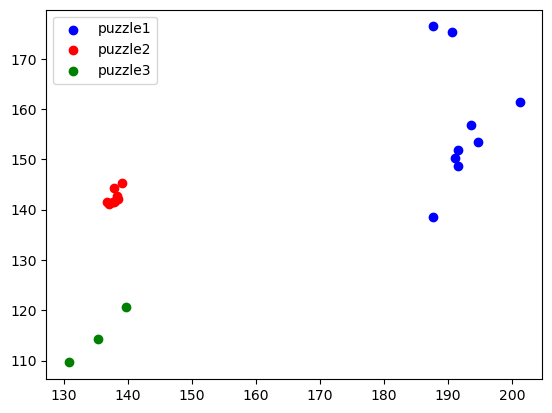

In [87]:
plt.scatter(feature1_df['kurtosis_gabor_1'], feature1_df['std_gabor_2'], c='b')
plt.scatter(feature2_df['kurtosis_gabor_1'], feature2_df['std_gabor_2'], c='r')
plt.scatter(feature3_df['kurtosis_gabor_1'], feature3_df['std_gabor_2'], c='g')
plt.legend(['puzzle1', 'puzzle2', 'puzzle3'])